# Analysis of Hawk/dove multiple risk attitudes with adjustment 

Similar to other notebooks, but using Polars instead of Pandas to allow working with larger set of simulation datae.

In [2]:
import polars as pl

#df = pl.read_csv("../data/hawkdovemulti/job_task_2024-02-07T064022_648635_model.csv")

df = pl.scan_csv("../../data/hawkdovemulti/job*2024-02*.csv").collect()


In [3]:
df.shape

(329665, 28)

In [4]:
df.describe()

statistic,RunId,iteration,Step,grid_size,risk_adjustment,play_neighborhood,observed_neighborhood,adjust_neighborhood,hawk_odds,adjust_every,risk_distribution,adjust_payoff,max_agent_points,percent_hawk,rolling_percent_hawk,status,total_agents,population_risk_category,total_r0,total_r1,total_r2,total_r3,total_r4,total_r5,total_r6,total_r7,total_r8,total_r9
str,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,str,str,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",329665.0,329665.0,329665.0,329665.0,"""329665""",329665.0,329665.0,329665.0,329665.0,329665.0,"""329665""","""329665""",329665.0,329665.0,329665.0,"""329665""",329665.0,329665.0,329665.0,329665.0,329665.0,329665.0,329665.0,329665.0,329665.0,329665.0,329665.0,329665.0
"""null_count""",0.0,0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",7212.875167,0.0,124.777256,28.022159,null,12.018382,11.999854,11.999794,0.499997,10.666264,null,null,2838.870981,0.488614,0.531348,null,1055.104803,7.963284,94.587563,84.953177,180.52307,85.880045,167.339693,71.510685,109.093604,61.427331,106.550246,93.239388
"""std""",4198.381063,0.0,118.755624,16.427545,null,8.642184,8.640746,8.640788,0.20412,7.363605,null,null,4358.804596,0.296785,0.061026,null,1024.055473,4.267834,172.923269,138.557945,252.44073,122.921687,245.864878,117.363135,152.078585,101.1804,193.33553,249.787431
"""min""",0.0,0.0,31.0,10.0,"""adopt""",4.0,4.0,4.0,0.25,2.0,"""bimodal""","""recent""",33.0,0.0,0.150667,"""converged""",100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",3583.0,0.0,62.0,10.0,null,4.0,4.0,4.0,0.25,2.0,null,null,882.0,0.2604,0.5,null,100.0,5.0,1.0,6.0,19.0,7.0,12.0,3.0,8.0,3.0,3.0,0.0
"""50%""",7166.0,0.0,89.0,25.0,null,8.0,8.0,8.0,0.5,10.0,null,null,1565.0,0.5156,0.52,null,625.0,7.0,19.0,27.0,80.0,34.0,62.0,20.0,46.0,19.0,29.0,5.0
"""75%""",10833.0,0.0,141.0,50.0,null,24.0,24.0,24.0,0.75,20.0,null,null,3110.0,0.68,0.564893,null,2500.0,13.0,95.0,97.0,243.0,107.0,232.0,82.0,150.0,77.0,119.0,56.0
"""max""",14579.0,0.0,2000.0,50.0,"""average""",24.0,24.0,24.0,0.75,20.0,"""uniform""","""total""",116944.0,1.0,1.0,"""running""",2500.0,13.0,2166.0,2047.0,2312.0,1380.0,2154.0,1378.0,2077.0,2312.0,2204.0,2500.0


In [5]:
df.head()

RunId,iteration,Step,grid_size,risk_adjustment,play_neighborhood,observed_neighborhood,adjust_neighborhood,hawk_odds,adjust_every,risk_distribution,adjust_payoff,max_agent_points,percent_hawk,rolling_percent_hawk,status,total_agents,population_risk_category,total_r0,total_r1,total_r2,total_r3,total_r4,total_r5,total_r6,total_r7,total_r8,total_r9
i64,i64,i64,i64,str,i64,i64,i64,f64,i64,str,str,i64,f64,f64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
0,0,31,10,"""adopt""",8,8,8,0.5,2,"""uniform""","""recent""",623,0.43,0.49,"""converged""",100,13,5,5,15,9,8,20,8,8,8,14
8,0,46,10,"""adopt""",8,8,8,0.5,2,"""bimodal""","""recent""",975,0.5,0.5,"""converged""",100,13,25,16,6,3,1,1,5,4,8,31
43,0,60,10,"""adopt""",8,8,8,0.25,10,"""normal""","""total""",523,0.0,0.5,"""converged""",100,5,0,18,8,16,25,22,7,4,0,0
42,0,60,10,"""adopt""",8,8,8,0.25,10,"""normal""","""recent""",518,0.0,0.5,"""converged""",100,7,0,2,4,10,25,33,19,6,1,0
23,0,84,10,"""adopt""",8,8,8,0.5,20,"""normal""","""total""",920,0.12,0.541667,"""converged""",100,5,12,5,14,54,6,0,9,0,0,0


In [6]:
df.columns

['RunId',
 'iteration',
 'Step',
 'grid_size',
 'risk_adjustment',
 'play_neighborhood',
 'observed_neighborhood',
 'adjust_neighborhood',
 'hawk_odds',
 'adjust_every',
 'risk_distribution',
 'adjust_payoff',
 'max_agent_points',
 'percent_hawk',
 'rolling_percent_hawk',
 'status',
 'total_agents',
 'population_risk_category',
 'total_r0',
 'total_r1',
 'total_r2',
 'total_r3',
 'total_r4',
 'total_r5',
 'total_r6',
 'total_r7',
 'total_r8',
 'total_r9']

In [7]:
# calculate percentages for each risk attitude

for i in range(0, 10):
    # calculate new series based on existing 
    pct_risk_category = df.select(pl.col(f"total_r{i}") / pl.col("total_agents"))
    # add new column to the dataframe
    df = df.with_columns(pl.Series(name=f"pct_r{i}", values=pct_risk_category))



In [8]:
# calculate percentages for each risk grouping

#  Risk-inclined (RI) : r = 0, 1, 2
#  Risk-moderate (RM): r = 3, 4, 5, 6
#  Risk-avoidant (RA): r = 7, 8, 9

df = df.with_columns(
    pl.Series('pct_risk_inclined', values=df.select((pl.col("total_r0") + pl.col("total_r1") + pl.col("total_r2")) / pl.col("total_agents"))),
    pl.Series('pct_risk_moderate', values=df.select((pl.col("total_r3") + pl.col("total_r4") + pl.col("total_r5") + pl.col("total_r6")) / pl.col("total_agents"))),
    pl.Series('pct_risk_avoidant', values=df.select((pl.col("total_r7") + pl.col("total_r8") + pl.col("total_r9")) / pl.col("total_agents")))
)

df[['pct_r0', 'pct_r1', 'pct_risk_inclined', 'pct_risk_moderate', 'pct_risk_avoidant']].head(10)

pct_r0,pct_r1,pct_risk_inclined,pct_risk_moderate,pct_risk_avoidant
f64,f64,f64,f64,f64
0.05,0.05,0.25,0.45,0.3
0.25,0.16,0.47,0.1,0.43
0.0,0.18,0.26,0.7,0.04
0.0,0.02,0.06,0.87,0.07
0.12,0.05,0.31,0.69,0.0
0.0,0.0,0.0,1.0,0.0
0.29,0.14,0.49,0.03,0.48
0.05,0.26,0.52,0.3,0.18
0.0,0.0,0.11,0.8,0.09


In [9]:
df.columns

['RunId',
 'iteration',
 'Step',
 'grid_size',
 'risk_adjustment',
 'play_neighborhood',
 'observed_neighborhood',
 'adjust_neighborhood',
 'hawk_odds',
 'adjust_every',
 'risk_distribution',
 'adjust_payoff',
 'max_agent_points',
 'percent_hawk',
 'rolling_percent_hawk',
 'status',
 'total_agents',
 'population_risk_category',
 'total_r0',
 'total_r1',
 'total_r2',
 'total_r3',
 'total_r4',
 'total_r5',
 'total_r6',
 'total_r7',
 'total_r8',
 'total_r9',
 'pct_r0',
 'pct_r1',
 'pct_r2',
 'pct_r3',
 'pct_r4',
 'pct_r5',
 'pct_r6',
 'pct_r7',
 'pct_r8',
 'pct_r9',
 'pct_risk_inclined',
 'pct_risk_moderate',
 'pct_risk_avoidant']

In [10]:
from sklearn import linear_model

# independent variables
grid_size = df[['grid_size']]
# dependent variable
pct_risk_inclined = df['pct_risk_inclined']


regr = linear_model.LinearRegression()
regr.fit(grid_size, pct_risk_inclined)

print("Coefficients: \n", regr.coef_)

Coefficients: 
 [-0.00047598]


In [11]:
_pred = regr.predict(df[['grid_size']])

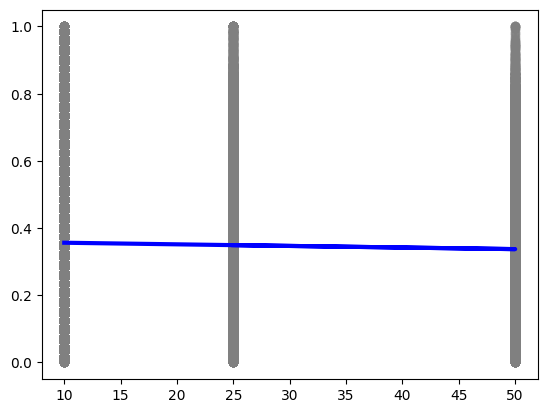

In [12]:
import matplotlib.pyplot as plt

plt.scatter(grid_size, pct_risk_inclined, color="gray", alpha=0.1)
plt.plot(grid_size, _pred, color="blue", linewidth=3)
plt.show()

In [21]:
df.head()

RunId,iteration,Step,grid_size,risk_adjustment,play_neighborhood,observed_neighborhood,adjust_neighborhood,hawk_odds,adjust_every,risk_distribution,adjust_payoff,max_agent_points,percent_hawk,rolling_percent_hawk,status,total_agents,population_risk_category,total_r0,total_r1,total_r2,total_r3,total_r4,total_r5,total_r6,total_r7,total_r8,total_r9,pct_r0,pct_r1,pct_r2,pct_r3,pct_r4,pct_r5,pct_r6,pct_r7,pct_r8,pct_r9,pct_risk_inclined,pct_risk_moderate,pct_risk_avoidant
i64,i64,i64,i64,str,i64,i64,i64,f64,i64,str,str,i64,f64,f64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0,0,31,10,"""adopt""",8,8,8,0.5,2,"""uniform""","""recent""",623,0.43,0.49,"""converged""",100,13,5,5,15,9,8,20,8,8,8,14,0.05,0.05,0.15,0.09,0.08,0.2,0.08,0.08,0.08,0.14,0.25,0.45,0.3
8,0,46,10,"""adopt""",8,8,8,0.5,2,"""bimodal""","""recent""",975,0.5,0.5,"""converged""",100,13,25,16,6,3,1,1,5,4,8,31,0.25,0.16,0.06,0.03,0.01,0.01,0.05,0.04,0.08,0.31,0.47,0.1,0.43
43,0,60,10,"""adopt""",8,8,8,0.25,10,"""normal""","""total""",523,0.0,0.5,"""converged""",100,5,0,18,8,16,25,22,7,4,0,0,0.0,0.18,0.08,0.16,0.25,0.22,0.07,0.04,0.0,0.0,0.26,0.7,0.04
42,0,60,10,"""adopt""",8,8,8,0.25,10,"""normal""","""recent""",518,0.0,0.5,"""converged""",100,7,0,2,4,10,25,33,19,6,1,0,0.0,0.02,0.04,0.1,0.25,0.33,0.19,0.06,0.01,0.0,0.06,0.87,0.07
23,0,84,10,"""adopt""",8,8,8,0.5,20,"""normal""","""total""",920,0.12,0.541667,"""converged""",100,5,12,5,14,54,6,0,9,0,0,0,0.12,0.05,0.14,0.54,0.06,0.0,0.09,0.0,0.0,0.0,0.31,0.69,0.0


In [24]:
import altair as alt

alt.data_transformers.enable("vegafusion")

alt.Chart(df).mark_bar().encode(
    x=alt.X('pct_risk_inclined', bin=True),
    y='count()'
)

alt.Chart(...)

Perctent risk inclined, risk moderate, risk avoidant across all runs.

<Axes: ylabel='Count'>

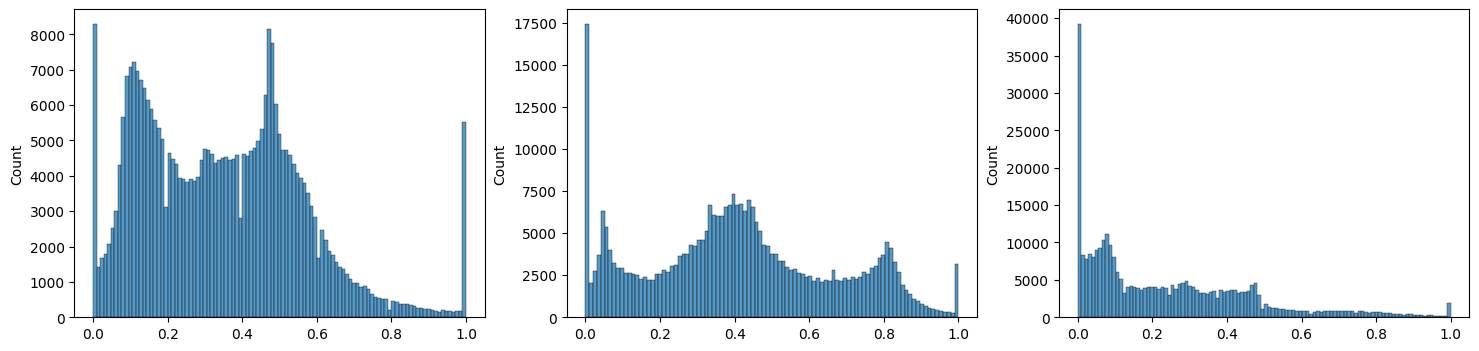

In [14]:
import seaborn as sns

f, axs = plt.subplots(1, 3, figsize=(18, 4))

sns.histplot(
    df["pct_risk_inclined"], ax=axs[0]
)
sns.histplot(
    df["pct_risk_moderate"], ax=axs[1]
)
sns.histplot(
    df["pct_risk_avoidant"], ax=axs[2]
)


KeyboardInterrupt: 

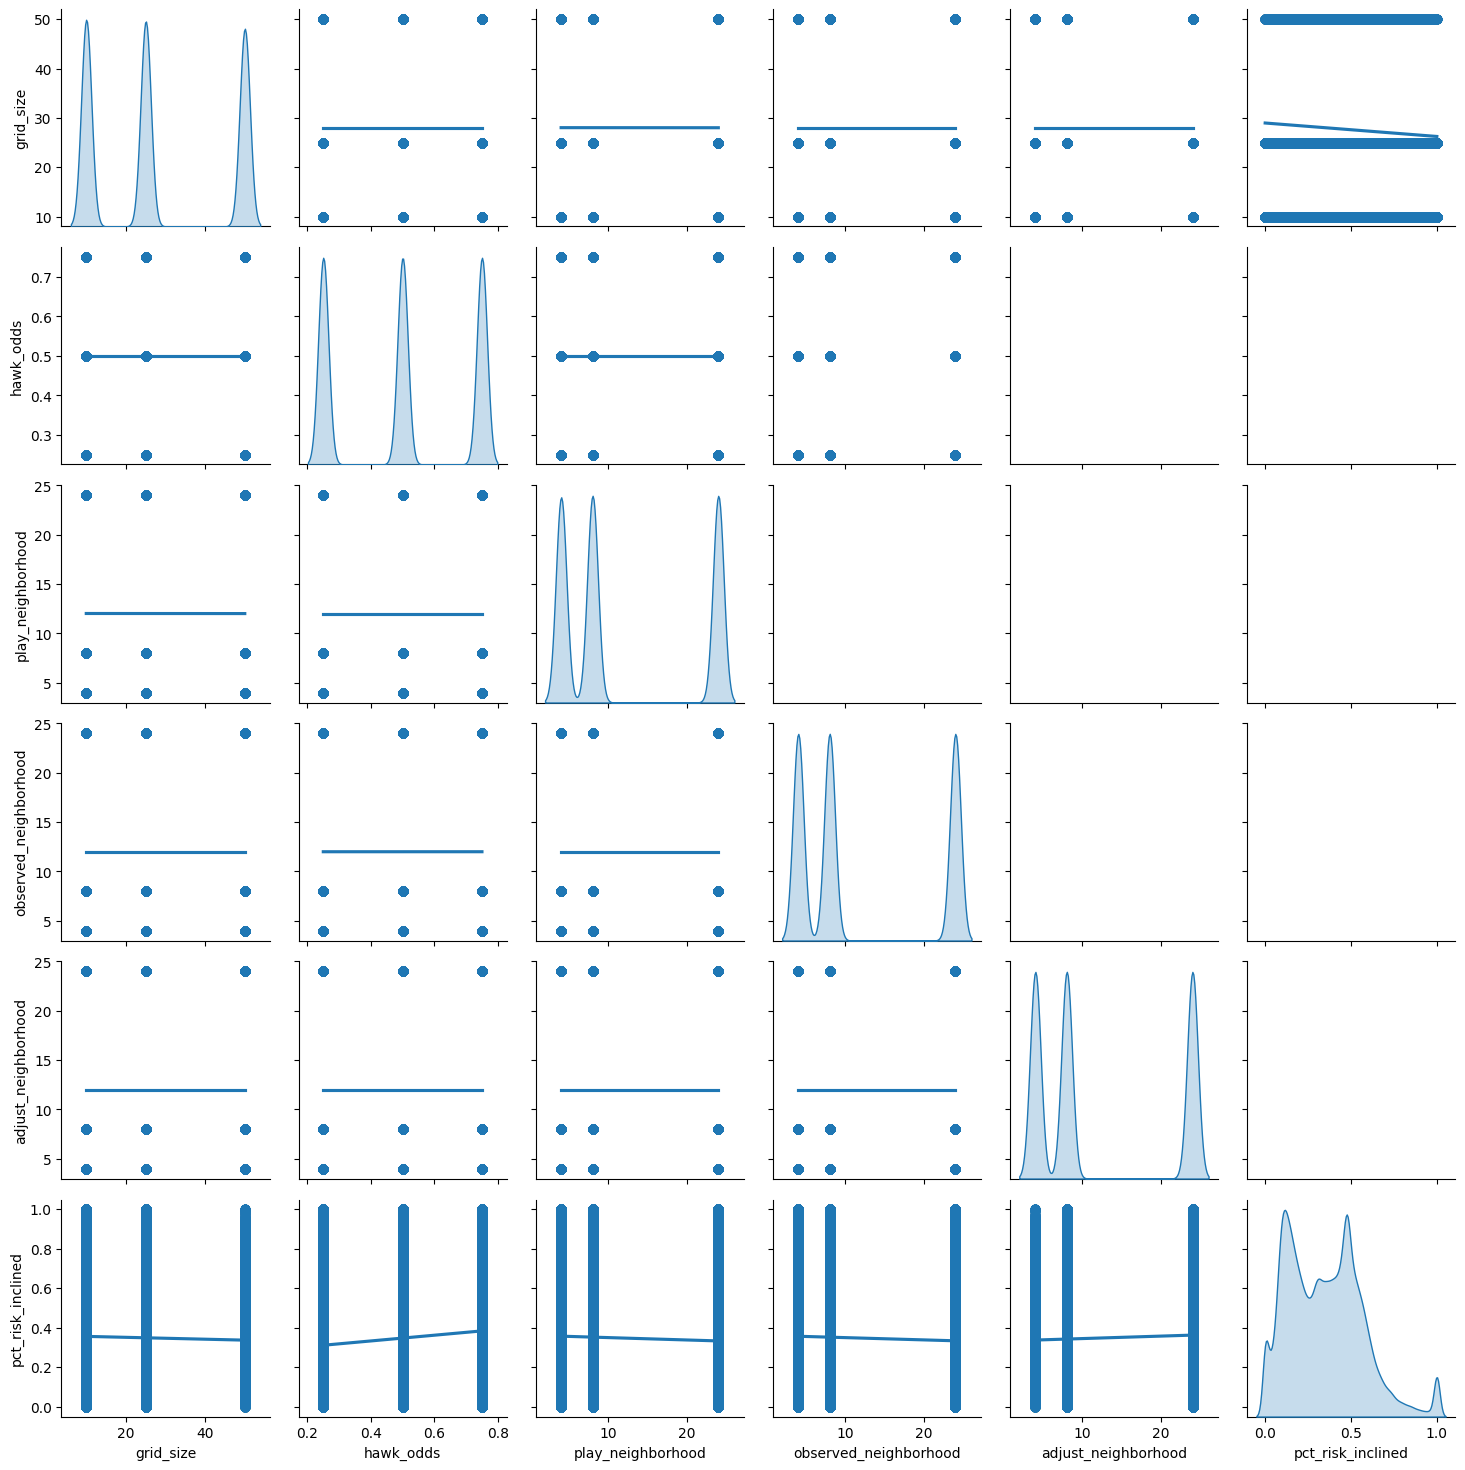

In [16]:
import seaborn as sns

# WARNiNG: this is slow on the larger set of simulation data

# do a pair plot on a subset of numeric columns that might correlate to population results

# subset and convert to pandas dataframe
df_compare = df[['grid_size', 'risk_adjustment', 'hawk_odds', 'play_neighborhood', 'observed_neighborhood', 'adjust_neighborhood', 'pct_risk_inclined']].to_pandas()

_ = sns.pairplot(df_compare, kind="reg", diag_kind="kde")

In [25]:
# what about adjustment neighborhood?

adjust_nhood = df[['adjust_neighborhood']]

adjust_nhood_regr = linear_model.LinearRegression()
adjust_nhood_regr.fit(adjust_nhood, pct_risk_inclined)

print("Coefficients: \n", adjust_nhood_regr.coef_)

Coefficients: 
 [0.0012542]


In [26]:
adjust_nhood_pred = adjust_nhood_regr.predict(adjust_nhood)
adjust_nhood_pred

array([0.3427938 , 0.3427938 , 0.3427938 , ..., 0.33777698, 0.3427938 ,
       0.3427938 ], shape=(329665,))

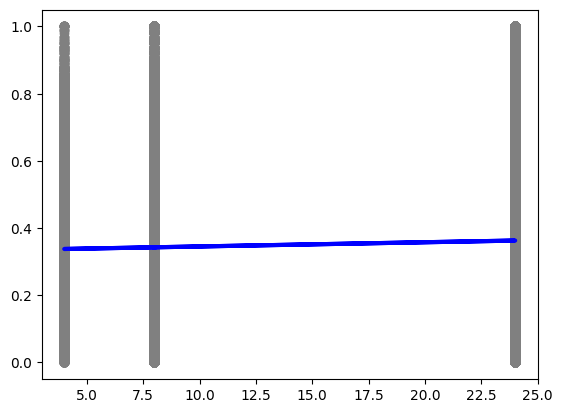

In [27]:
plt.scatter(adjust_nhood, pct_risk_inclined, color="gray", alpha=0.3)
plt.plot(adjust_nhood, adjust_nhood_pred, color="blue", linewidth=3)
plt.show()

In [28]:
# following along from here:
# https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#the-machine-learning-pipeline

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ["risk_adjustment", "adjust_payoff", "risk_distribution"]
numerical_columns = ['grid_size', 'hawk_odds', 'play_neighborhood', 'observed_neighborhood', 'adjust_neighborhood']

preprocessor = make_column_transformer(
    (OneHotEncoder(drop="if_binary"), categorical_columns),
    remainder="passthrough",
    verbose_feature_names_out=False,  # avoid to prepend the preprocessor names
)

In [29]:
import numpy as np
import scipy as sp

from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        # the scikit learn tutorial uses a log function for predicting wages; we're checking for correlation for a % of population, so disable the log scale
#        regressor=Ridge(alpha=1e-10), func=np.log10, inverse_func=sp.special.exp10
        regressor=Ridge(alpha=1e-10), #func=np.log10, inverse_func=sp.special.exp10
    ),
)

In [30]:
# make an input dataset based on the categorical and numerical columns we want to use

df_input = df[categorical_columns + numerical_columns]
df_input.head()

risk_adjustment,adjust_payoff,risk_distribution,grid_size,hawk_odds,play_neighborhood,observed_neighborhood,adjust_neighborhood
str,str,str,i64,f64,i64,i64,i64
"""adopt""","""recent""","""uniform""",10,0.5,8,8,8
"""adopt""","""recent""","""bimodal""",10,0.5,8,8,8
"""adopt""","""total""","""normal""",10,0.25,8,8,8
"""adopt""","""recent""","""normal""",10,0.25,8,8,8
"""adopt""","""total""","""normal""",10,0.5,8,8,8


In [31]:
# target for prediction - use percent of population that end up risk inclined;
# using this as a preliminary a stand-in for various population categories for now

target = df['pct_risk_inclined']

In [32]:
target.to_pandas()[:10]

0    0.25
1    0.47
2    0.26
3    0.06
4    0.31
5    0.00
6    0.49
7    0.52
8    0.11
9    0.10
Name: pct_risk_inclined, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split

input_train, input_test, target_train, target_test = train_test_split(df_input.to_pandas(), target.to_pandas(), random_state=42)

In [34]:
# fit the model to the training data
model.fit(input_train, target_train)

/Users/rkoeser/workarea/env/simrisk/lib/python3.12/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Ill-conditioned matrix (rcond=1.74298e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


,steps,"[('columntransformer', ...), ('transformedtargetregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


In [35]:
from sklearn.metrics import PredictionErrorDisplay, median_absolute_error

mae_train = median_absolute_error(target_train, model.predict(input_train))
target_pred = model.predict(input_test)
mae_test = median_absolute_error(target_test, target_pred)
scores = {
    "MedAE on training set": f"{mae_train:.2f}",
    "MedAE on testing set": f"{mae_test:.2f}",
}
for label, value in scores.items():
    print(f"{label}: {value}")

MedAE on training set: 0.09
MedAE on testing set: 0.09


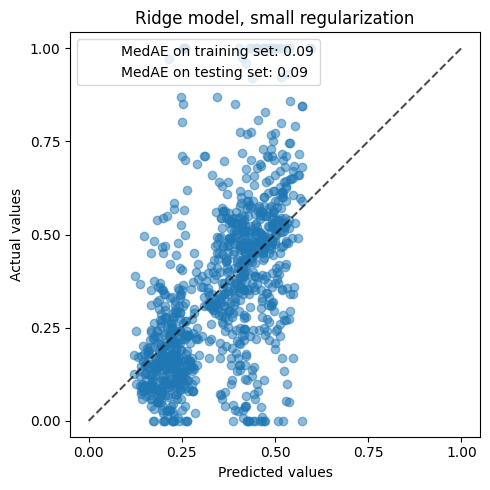

In [36]:
_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    target_test, target_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)
ax.set_title("Ridge model, small regularization")
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

In [37]:
feature_names = model[:-1].get_feature_names_out()
feature_names
# coefs = pd.DataFrame(
#     model[-1].regressor_.coef_,
#     columns=["Coefficients"],
#     index=feature_names,
# )

# coefs

array(['risk_adjustment_average', 'adjust_payoff_total',
       'risk_distribution_bimodal', 'risk_distribution_normal',
       'risk_distribution_skewed left', 'risk_distribution_skewed right',
       'risk_distribution_uniform', 'grid_size', 'hawk_odds',
       'play_neighborhood', 'observed_neighborhood',
       'adjust_neighborhood'], dtype=object)

In [38]:
model[-1].regressor_.coef_

array([ 2.80499556e-02,  4.80056491e-03,  2.07603256e+00,  1.84270684e+00,
        2.14331982e+00,  1.86422894e+00,  2.02483921e+00, -4.89829477e-04,
        1.45033581e-01, -1.22015180e-03, -1.13866192e-03,  1.26578423e-03])

In [39]:
coefs = pl.from_dict({"Coefficients": model[-1].regressor_.coef_, "feature_names":feature_names})
coefs

Coefficients,feature_names
f64,str
0.02805,"""risk_adjustment_average"""
0.004801,"""adjust_payoff_total"""
2.076033,"""risk_distribution_bimodal"""
1.842707,"""risk_distribution_normal"""
2.14332,"""risk_distribution_skewed left"""
…,…
-0.00049,"""grid_size"""
0.145034,"""hawk_odds"""
-0.00122,"""play_neighborhood"""


In [47]:
alt.Chart(coefs).mark_bar().encode(
    x=alt.X("Coefficients", title="Raw coefficient values"),
    y=alt.Y("feature_names", title="Feature")
).properties(title="Ridge model, small regularization", width=500)

alt.Chart(...)